# The Gaussian Distribution

## Introduction

In the realm of biostatistics, the **Gaussian distribution**, also known as the **normal distribution**, plays a pivotal role. It is a continuous probability distribution that is symmetric about the mean, showcasing data that clusters around a central peak and tapers off as we move away from the mean.

## Definitions

### The Standard Deviation (SD)

One of the key parameters of the Gaussian distribution is the **Standard Deviation (SD)**. The SD is a measure of the _spread_ of the distribution. In a Gaussian population, about 95% of the values lie within 2 SD of the mean. To be more precise, approximately 95% of the values are within 1.96 standard deviations from the mean. This property is a fundamental aspect of the Gaussian distribution and is crucial in the field of biostatistics, where it is often used in hypothesis testing and confidence interval construction.

### The Standard Normal Distribution

A special case of the Gaussian distribution is the **Standard Normal Distribution**. This is a Gaussian distribution with a _mean of 0 and an SD of 1_.

Every Gaussian distribution can be transformed into a standard normal distribution by taking each value, deducting the mean, and then dividing the result by the standard deviation. This process is known as **standardization** or **normalization**.

The standard normal distribution is a fundamental tool in statistics, primarily used for the generation of **z-scores**. These z-scores are instrumental in comparing data points from various distributions, thereby facilitating a standardized comparison:

$$z=\frac{\text{value}-\text{mean}}{\text{SD}}$$

The variable $z$ is the number of SD away from the mean, e.g., when $z=1$ a value of 1 SD above the mean, when $z=-2$ a value of 2 SD below the mean.

### The Central Limit Theorem (CLT)

We have already encountered the the **Central Limit Theorem (CLT)** in a previous chapter. The CLT is a key theorem in statistics that states that the distribution of many sample means, randomly picked, will tend to be Gaussian, even if the data are not sampled from a Gaussian distribution. This theorem underpins many statistical procedures and concepts, including confidence intervals and hypothesis tests.

## Visualizing the Standard Normal Distribution

### The Probability Density Function (PDF)

The **Probability Density Function (PDF)** for a Gaussian distribution is a function that describes the likelihood of a random variable taking on a particular value. In other words, the PDF gives the probability density at a given point in the distribution.

In the context of a Gaussian distribution, the PDF is _bell-shaped_, indicating that values near the mean are more likely to occur. The shape of the PDF is determined by two parameters:

1. the mean, which determines the center of the distribution, and 
2. the standard deviation, which determines the spread or width of the distribution.

The PDF is used to specify the probability of the random variable falling within a particular range of values. The total _area under the curve of the distribution always equals 1_. This is because it represents a probability distribution - the probabilities of all possible outcomes must add up to 1.

In practical terms, the PDF of a Gaussian distribution can be used to find the probability of a random variable falling within a certain range of values. For example, in a standard normal distribution, about 68% of the data falls within one standard deviation of the mean (between -1 and 1), about 95% falls within two standard deviations (between -2 and 2), and about 99.7% falls within three standard deviations (between -3 and 3). This is known as the **empirical rule** or the **68-95-99.7 rule**.

Let's use Python to visualize the **Probability Density Function (PDF)** of a standard normal distribution.

We will create three different subplots, each highlighting the area within 1, 2, and 3 standard deviations from the mean, respectively. This will be achieved using the [`fill_between` method](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) from the `matplotlib` library.

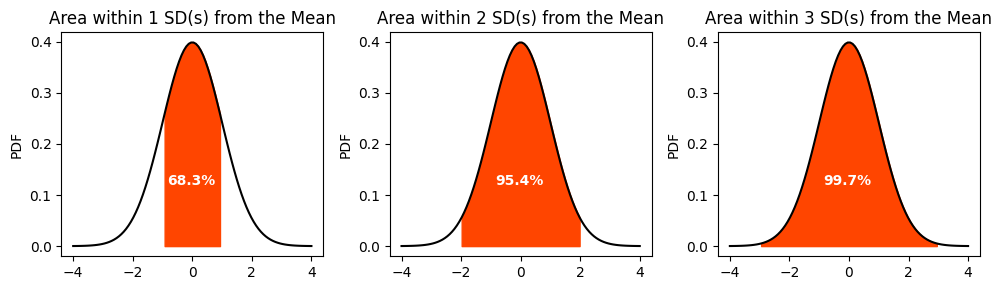

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the standard normal distribution
mu = 0
sigma = 1

# set the Gaussian model
gauss = norm(loc=mu, scale=sigma)

# compute the PDF values
x = np.linspace(
    mu - 4*sigma, # could also use gauss.ppf(0.0001)
    mu + 4*sigma, # could also use gauss.ppf(0.9999)
    100)

y = gauss.pdf(x)

# plot the distribution
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Fill between 1, 2, and 3 standard deviations
for i, n in enumerate([1, 2, 3]):
    axs[i].plot(x, y, 'k')
    axs[i].fill_between(x, y, where=((x > mu - n*sigma) & (x < mu + n*sigma)), color='orangered',)
    axs[i].set_title(f'Area within {n} SD(s) from the Mean')
    axs[i].set_ylabel('PDF')

    axs[i].text(
        -.85, .12,
        # displays percent data within -n to n standard deviations from the mean:
        f"{100 * (1 - 2*(1 - gauss.cdf(n))):.1f}%",
        fontdict={'color': 'white', 'size':10, 'weight':'bold'})

plt.tight_layout();

### The Cumulative Distribution Function (CDF)

The **Cumulative Distribution Function (CDF)** is a function that gives the probability that a random variable is _less than or equal to_ a certain value. It is used to describe the probability distribution of random variables. For a Gaussian distribution, the CDF can be used to determine the probability that a random observation that is taken from the population will be less than or equal to a certain value.

In the context of the standard normal distribution, the CDF at a particular point $x$ on the x-axis gives the _area under the curve to the left of $x$_. This area represents the probability that a random observation from the population is less than or equal to $x$.

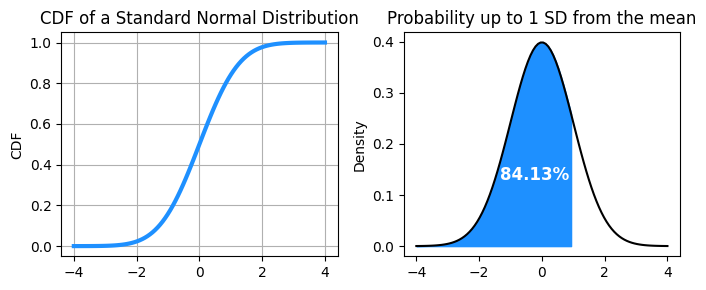

In [2]:
# Define the standard normal distribution
mu = 0
sigma = 1

# set the Gaussian model
gauss = norm(loc=mu, scale=sigma)

x = np.linspace(
    mu - 4*sigma, # could also use gauss.ppf(0.0001)
    mu + 4*sigma, # could also use gauss.ppf(0.9999)
    100)

fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# We first plot the CDF function
y = gauss.cdf(x)
axes[0].plot(x, y, color='dodgerblue', lw=3)
axes[0].set_title('CDF of a Standard Normal Distribution')
axes[0].set_ylabel('CDF')
axes[0].grid(True)

# And then the PDF with the area filled under the PDF curve up to a given SD
given_SD = 1
y = gauss.pdf(x)
axes[1].plot(x, y, 'k')
axes[1].fill_between(x, y, where=(x <= mu + given_SD*sigma), color='dodgerblue',)
axes[1].set_title(f"Probability up to {given_SD} SD from the mean")
axes[1].set_ylabel('Density')

axes[1].text(
    -1.35, .13,
    f"{100 * gauss.cdf(given_SD):.2f}%",
    fontdict={'color': 'white', 'size':12, 'weight':'bold'},
)

plt.tight_layout();

We can also simply print the cumulative probabilities for each of the values from -3 to 3 in a standard normal distribution.

In [3]:
for x in np.arange(-3, 4):
    print(f"x={x}\tCDF={gauss.cdf(x):.4f}")

x=-3	CDF=0.0013
x=-2	CDF=0.0228
x=-1	CDF=0.1587
x=0	CDF=0.5000
x=1	CDF=0.8413
x=2	CDF=0.9772
x=3	CDF=0.9987


The closer the number is to 0, the closer its corresponding cumulative probability is to 0.5. The cumulative probability increases as the number increases and decreases as the number decreases. The cumulative probability is always between 0 and 1. The cumulative probability at 0 is 0.5 because the standard normal distribution is symmetric about 0. The cumulative probability at -3 is close to 0 because most of the values in a standard normal distribution are greater than -3. The cumulative probability at 3 is close to 1 because most of the values in a standard normal distribution are less than 3.

### The Percent Point Function (PPF)

The **Percent Point Function (PPF)**, also known as the **quantile function**, is the inverse of the CDF. It returns the value $x$ such that the probability of a random observation being less than or equal to $x$ is equal to a given probability $p$. In other words, it gives the value at the pth percentile of the distribution.

In [4]:
# Calculate the PPF
ppf = gauss.ppf(p:=0.9772)

print(f'The PPF for p={p} in a standard normal distribution is {ppf:.3f}')

The PPF for p=0.9772 in a standard normal distribution is 1.999


### The Survival Function

The **Survival Function (SF)**, also known as the **reliability function**, is a fundamental concept in statistics, particularly in survival analysis. It is defined as the probability that a random variable exceeds a certain value. In the context of the standard normal distribution, the survival function at a point $x$ is given by $1 - \text{CDF}(x)$. This means that the survival function gives the probability that a random observation from the population is greater than $x$.

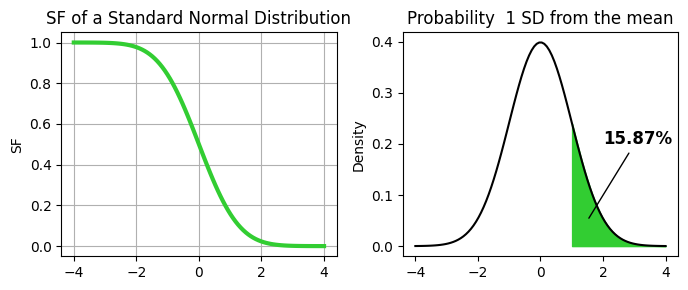

In [5]:
# Define the standard normal distribution
mu = 0
sigma = 1

# set the Gaussian model
gauss = norm(loc=mu, scale=sigma)

x = np.linspace(
    mu - 4*sigma, # could also use gauss.ppf(0.0001)
    mu + 4*sigma, # could also use gauss.ppf(0.9999)
    100)

fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# We first plot the SF function
y = gauss.sf(x)
axes[0].plot(x, y, color='limegreen', lw=3)
axes[0].set_title('SF of a Standard Normal Distribution')
axes[0].set_ylabel('SF')
axes[0].grid(True)

# And then the PDF with the area filled under the PDF curve from a given SD
given_SD = 1
y = gauss.pdf(x)
axes[1].plot(x, y, 'k')
axes[1].fill_between(x, y, where=(x > mu + given_SD*sigma), color='limegreen',)
axes[1].set_title(f"Probability  {given_SD} SD from the mean")
axes[1].set_ylabel('Density')

axes[1].annotate(
    xy=(1.5, .05),
    xytext=(2, .2),
    text=f"{100 * gauss.sf(x=given_SD):.2f}%",
    arrowprops={'arrowstyle': '-'},
    size=12,
    weight='bold',
)

plt.tight_layout();

### The two-tailed Survival Function

The **two-tailed Survival Function** is a concept used in hypothesis testing in statistics. It gives the probability that a random variable deviates from the mean by more than a certain value in either direction. In other words, it's the _sum of the probabilities in both tails_ of the distribution. For a Gaussian distribution, the two-tailed SF at a point $x$ is given by $2 \times (1 - \text{CDF}(|x|))$.

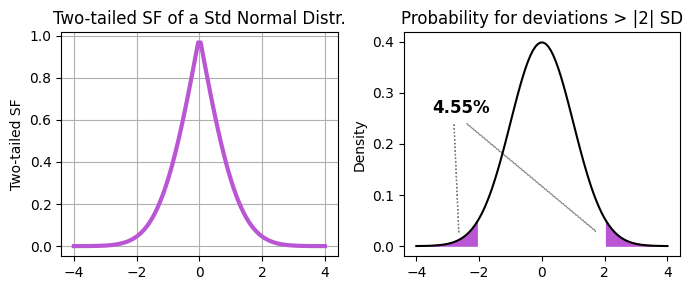

In [6]:
# Define the standard normal distribution
mu = 0
sigma = 1

# set the Gaussian model
gauss = norm(loc=mu, scale=sigma)

x = np.linspace(
    mu - 4*sigma, # could also use gauss.ppf(0.0001)
    mu + 4*sigma, # could also use gauss.ppf(0.9999)
    100)

fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# We first plot the SF function
y = 2 * (1 - gauss.cdf(np.abs(x)))
axes[0].plot(x, y, color='mediumorchid', lw=3)
axes[0].set_title('Two-tailed SF of a Std Normal Distr.')
axes[0].set_ylabel('Two-tailed SF')
axes[0].grid(True)

# And then the PDF with the area filled under the PDF curve from a given SD
given_SD = 2
y = gauss.pdf(x)
axes[1].plot(x, y, 'k')
axes[1].fill_between(x, y, where=((x < mu - np.abs(given_SD)*sigma) | (x > mu + np.abs(given_SD)*sigma)), color='mediumorchid',)
axes[1].set_title(f"Probability for deviations > |{given_SD}| SD")
axes[1].set_ylabel('Density')


axes[1].text(
    -3.5, .26,
    f"{100 * (2 * (1 - gauss.cdf(given_SD))):.2f}%",
    fontdict={'color': 'black', 'size':12, 'weight':'bold'})
axes[1].arrow(x=-2.8, y=.24, dx=.15, dy=-.21, color='grey', ls=':')
axes[1].arrow(x=-2.4, y=.24, dx=4.1, dy=-.21, color='grey', ls=':')

plt.tight_layout();

For a two-tailed survival function of a standard normal distribution, the function value starts low for negative $x$ (far from the mean), increases as $x$ approaches the mean (reaching 1 at $x=0$), and then decreases again for positive $x$ (far from the mean). This is because the two-tailed survival function gives the probability of a random variable deviating from the mean by more than a certain value, in either direction. So, it's highest at the mean (where deviation is zero) and gets lower as we move away from the mean in either direction. 

### The P value

In hypothesis testing, a **p-value** or **P value** is the probability of obtaining a result _as extreme as, or more extreme than_, the observed result, assuming that the **null hypothesis** is true. The p-value is used to decide whether to reject the null hypothesis.

The two-tailed SF is used to calculate p-values because it gives the probability of a random variable deviating from the mean by more than a certain value in either direction. In other words, it gives the probability of observing a result as extreme as, or more extreme than, the observed result, under the null hypothesis.

Here's why this is important:

- If we're doing a _two-tailed test_, were looking at the extreme ends of _both tails_ of the distribution. We're testing for the possibility of the relationship in both directions. For example, if we're testing whether a coefficient is _significantly different_ from zero, we're testing both whether it's significantly positive and significantly negative. The two-tailed SF is perfect for this because it gives the sum of the probabilities in both tails of the distribution.
- If we're doing a one-tailed test, we're only looking at one tail of the distribution. For example, you might only be testing whether a coefficient is _significantly positive_. In this case, you would use the one-tailed SF.

In upcoming chapters, we will delve deeper into the concept of the p-value, by exploring its role and application in various contexts, including but not limited to comparing means, proportions, survival data, and models.

## Conclusion

In this chapter, we embarked on a journey through the fascinating world of the Gaussian distribution, a cornerstone in the field of statistics and data analysis. We explored its key parameters, the mean and the standard deviation, and how they shape the distribution. We learned about the standard normal distribution, a special case of the Gaussian distribution with a mean of 0 and a standard deviation of 1.

We delved into the Central Limit Theorem (CLT), a fundamental theorem in statistics that tells us about the behavior of averages of random variables. We saw how, regardless of the shape of the original distribution, the distribution of sample means tends to be Gaussian.

We also discussed the Probability Density Function (PDF), the Cumulative Distribution Function (CDF), and the Survival Function (SF), and how they are used to understand and visualize the distribution. We learned about the concept of z-scores and how they are used to compare data points from different distributions. Towards the end, we introduced the concept of the two-tailed SF and its use in hypothesis testing for calculating p-values. We also touched upon the Percent Point Function (PPF) or the inverse of the CDF.

We used Python and the matplotlib library to visualize these concepts. We plotted the Gaussian distribution, filled areas under the curve to represent probabilities, and created subplots to compare different aspects of the distribution.

In the upcoming chapters, we will delve deeper into these concepts, exploring their applications in comparing means, proportions, survival data analysis, and model comparison. We will also discuss in detail the concept of p-values and their role in hypothesis testing.

This chapter has laid the foundation for understanding the Gaussian distribution and its significance in statistics. As we move forward, these concepts will become increasingly important, providing the basis for many of the techniques and methods used in data analysis and statistical inference.

## Session Information

The output below details all packages and version necessary to reproduce the results in this report.

In [7]:
!python --version
print("-------------")
# List of packages we want to check the version
packages = ['numpy', 'scipy', 'matplotlib']

# Initialize an empty list to store the versions
versions = []

# Loop over the packages
for package in packages:
    # Get the version of the package
    output = !pip show {package} | findstr "Version"
    # If the output is not empty, get the version
    if output:
        version = output[0].split()[-1]
    else:
        version = 'Not installed'
    # Append the version to the list
    versions.append(version)

# Print the versions
for package, version in zip(packages, versions):
    print(f'{package}: {version}')

Python 3.12.3
-------------
numpy: 1.26.4
scipy: 1.13.0
matplotlib: 3.8.4
